# Gradient Descent

In [2]:
import warnings
import numpy as np

## Computing Gradient of a Function

In [3]:
def partial(f, x, i=0, dx=1e-6):
    """Computes i-th partial derivative of f at point x.
    
    Args:
        f: objective function.
        x: point at which partial derivative is computed.
        i: coordinate along which derivative is computed.
        dx: slack for finite difference.
        
    Output:
        (float)

    """
    x = x.reshape(1, -1)
    h = np.zeros(x.shape)
    h[0, i] = dx
    return (f(x + h) - f(x - h)) / (2*dx)

In [4]:
partial(lambda x: x[0, 0]**4 + x[0, 1], np.array([5, 6]))

500.00000004502

In [5]:
def gradient(f, x, dx=1e-6):
    """Computes gradient of f at point x.
    
    Args:
        f: objective function.
        x: point at which gradient is computed.
        dx: slack for finite difference of partial derivatives.
        
    Output:
        (ndarray) of size domain of f.
        
    """
    x = x.reshape(1, -1)
    dim = x.shape[1]
    return np.array([partial(f, x, i, dx) for i in range(dim)]).reshape(1, -1)

In [6]:
gradient(lambda x: x[0, 0]**5 + x[0, 1]*2, np.array([1, 10]))

array([[5., 2.]])

## Gradient Descent Class

In [27]:
class GD():
    """Gradient Descent Object.
    
    Implements gradient descent aiming to compute optimal objective 
    value of convex functions and local optimal ones of none 
    convex functions.
    
    """    
    def __init__(self, d_dir=gradient, 
                 rate=(lambda x, y, z, t: 0.01), 
                 decay=(lambda x: np.linalg.norm(x)), 
                 tol=1e-6, max_iter=1000):
        """        
        Instantiates a GD object.
    
        Attributes:
        d_dir: function computing descent direction.
        rate: function computing learning rate ; takes in
              - f (function): objective function
              - x (ndarray): current iterate
              - dir_x (ndarray): output of a descent direction function
              - grad (ndarray): gradient function.
        decay: function computing decay.
        tol: slack tolerance.
        max_iter: upper bound on number of iterations.
    
        """
        self.d_dir = d_dir
        self.rate = rate
        self.decay = decay
        self.tol = tol
        self.max_iter = max_iter
    
    def __call__(self, x, f):
        """Calling gradient descent object with specific starting point and optimal function.
        
        Args:
            x: initial starting point for descent.
            f: objective function of optimisation problem.
        
        Output:
            (float) sub-optimal value up to tolerance if execution is proper.
            (ndarray) list of gradient descent iterates.
            
        """
        x = x.reshape(1, -1)
        n_iter = 0
        dir_x = -self.d_dir(f, x, self.tol)
        delta_x = self.rate(f, x, dir_x, n_iter) * dir_x
        iters, iters_dir = x, delta_x
        grad_f_x = gradient(f, x)
        decay = self.decay(grad_f_x)
        while decay > self.tol and n_iter < self.max_iter:
            ## Deciding on direction
            dir_x = -self.d_dir(f, x, self.tol)
            delta_x = self.rate(f, x, dir_x, n_iter) * dir_x
            ## Updating iterate
            x = x + delta_x
            ## Storing on-going data
            iters_dir = np.vstack([iters_dir, delta_x])
            iters = np.vstack([iters, x])
            ## Computing decay
            grad_f_x = gradient(f, x)
            decay = self.decay(grad_f_x)
            ## Updating iteration number
            n_iter += 1
        msg = " Iteration nu. = {}\n approx. = {}\n ob value = {}\n and decay = {}."
        print(msg.format(n_iter, x.flatten(), f(x), decay))
        if decay > self.tol:
            warnings.warn("Decay didn't get under tolerance rate.", RuntimeWarning)
        return (x, iters, iters_dir, n_iter) 

In [36]:
DG_classic = GD()

`DG_classic` is an instance of `GD` having standard direction given by the `gradient` and constant learning rate fixed to `0.01`.

In [29]:
op_pt, iters, iters_dir, n_iter = DG_classic(np.array([10]), lambda x: 3*x[0]**2 + 2*x[0] + 1)

 Iteration nu. = 290
 approx. = [-0.33333317]
 ob value = [0.66666667]
 and decay = 9.987566329527908e-07.


In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
sns.set_style("whitegrid")

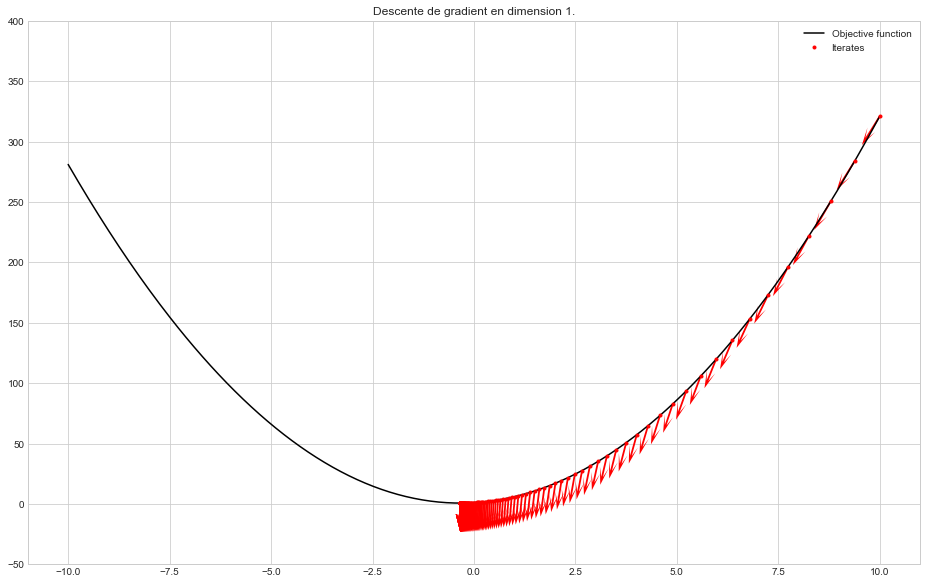

In [37]:
fig, ax = plt.subplots(figsize=(16, 10))
f = lambda x : 3*x**2 + 2*x + 1
x = np.linspace(-10, 10, 400)
ax.set_ylim(-50, 400)
ax.plot(x, f(x), "k-", label="Objective function")
# reshaping iters for input
iters_reshape = iters.reshape(iters.shape[0], 1)
ax.plot(iters_reshape, f(iters_reshape), 'r.', label="Iterates")
ax.quiver(iters_reshape, f(iters_reshape), iters_dir, -1, 
          color='r', scale=None, width=0.002, headwidth=5, headlength=10)
ax.set_title("Descente de gradient en dimension 1.")
ax.legend()

In [48]:
rates = [0.01, 0.02, 0.04, 0.06,0.08, 0.1, 0.2, 0.5, 1]
n_iters, approxs = [], []
for rate in rates:
    GD_rate = GD(rate=lambda x, y, z, t: rate)
    approx, _, _, n_iter = GD_rate(np.array([10]), f)
    n_iters.append(n_iter)
    approxs.append(approx[0, 0])

 Iteration nu. = 290
 approx. = [-0.33333317]
 ob value = [[0.66666667]]
 and decay = 9.987566329527908e-07.
 Iteration nu. = 141
 approx. = [-0.33333318]
 ob value = [[0.66666667]]
 and decay = 9.214295992876487e-07.
 Iteration nu. = 66
 approx. = [-0.33333319]
 ob value = [[0.66666667]]
 and decay = 8.434919429589627e-07.
 Iteration nu. = 41
 approx. = [-0.33333322]
 ob value = [[0.66666667]]
 and decay = 7.011058400507864e-07.
 Iteration nu. = 28
 approx. = [-0.33333322]
 ob value = [[0.66666667]]
 and decay = 6.926681450636352e-07.
 Iteration nu. = 20
 approx. = [-0.33333322]
 ob value = [[0.66666667]]
 and decay = 6.816769371198461e-07.
 Iteration nu. = 12
 approx. = [-0.33333329]
 ob value = [[0.66666667]]
 and decay = 2.539080057317733e-07.
 Iteration nu. = 31
 approx. = [-5.37952412e+10]
 ob value = [[8.68178392e+21]]
 and decay = 0.0.
 Iteration nu. = 14
 approx. = [1.19244576e+11]
 ob value = [[4.26578065e+22]]
 and decay = 0.0.


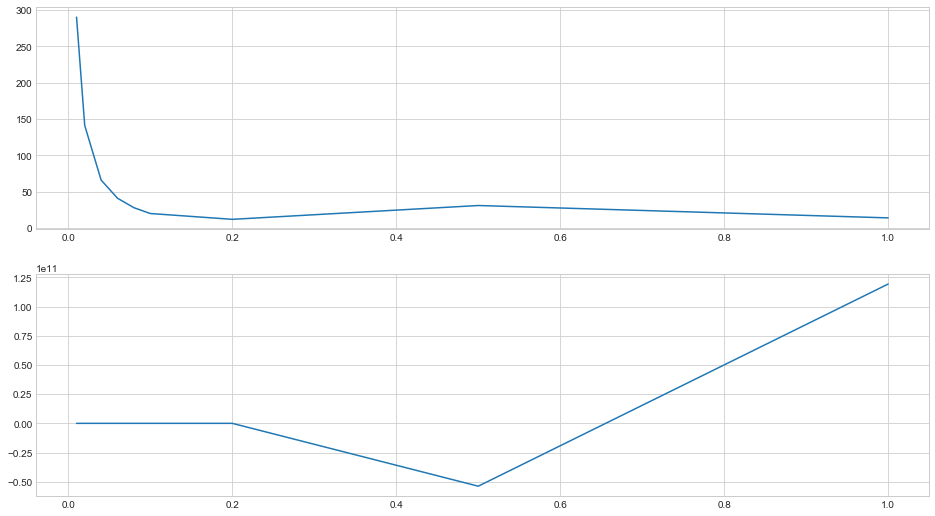

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(16, 9))
ax[0].plot(rates, n_iters)
ax[1].plot(rates, approxs)

In [33]:
g = lambda x: x[0, 0]**2 + 10*x[0, 1]**2
op_pt_2, iters_2, iters_dir_2, n_iter_2 = DG_classic(np.array([1.5, 1.5]), g)

 Iteration nu. = 739
 approx. = [ 4.92222198e-07 -9.18170480e-23]
 ob value = 2.422826926562737e-13
 and decay = 9.844443969189396e-07.


**A quick remark about `meshgrid`**

In [34]:
x = np.linspace(0, 2, 3)
y = np.linspace(0, 2, 3)
X, Y = np.meshgrid(x, y)
np.vstack([X.reshape(1, -1), Y.reshape(1, -1)]).reshape(1, 2, -1)

array([[[0., 1., 2., 0., 1., 2., 0., 1., 2.],
        [0., 0., 0., 1., 1., 1., 2., 2., 2.]]])

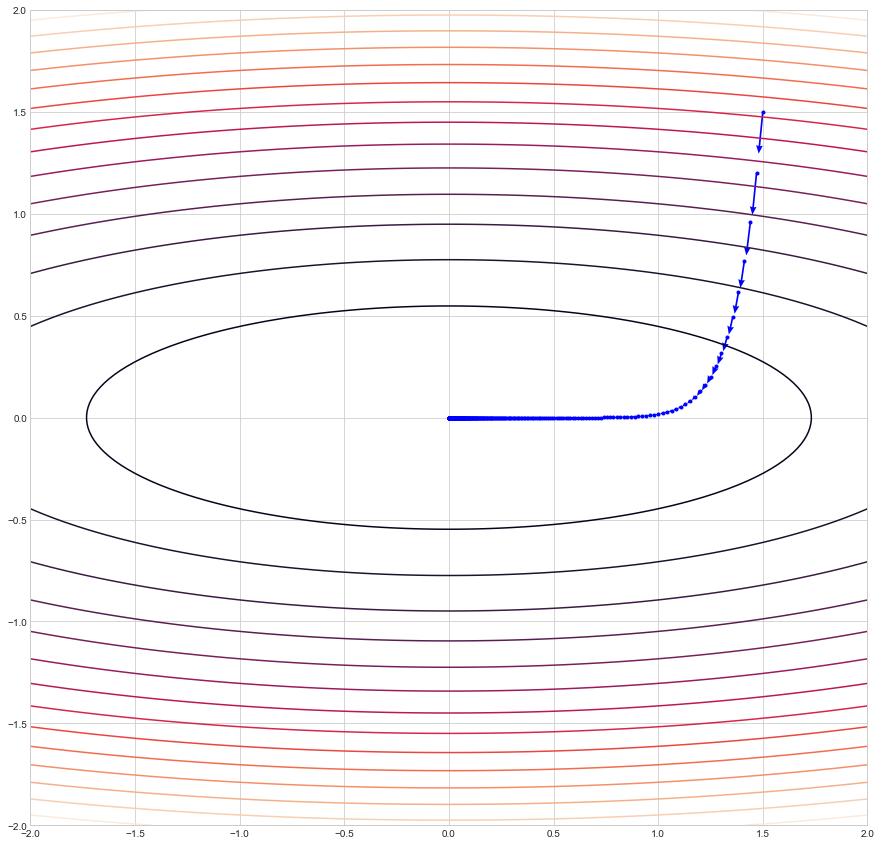

In [51]:
nb_pts, x_mi, x_ma, y_mi, y_ma = 200, -2, 2, -2, 2
fig, ax = plt.subplots(figsize=(15, 15))
x, y = np.linspace(x_mi, x_ma, nb_pts), np.linspace(x_mi, x_ma, nb_pts)
X, Y = np.meshgrid(x, y)
## Reshaping X, Y for proper evaluation by input function
x_y = np.vstack([X.reshape(1, -1), Y.reshape(1, -1)]).reshape(1, 2, -1)
ax.set_xlim(x_mi, x_ma)
ax.set_ylim(y_mi, y_ma)
ax.contour(X, Y, g(x_y).reshape(nb_pts, -1), 15)
ax.quiver(iters_2[:, 0], iters_2[:, 1], iters_dir_2[:, 0], iters_dir_2[:, 1],
          color='b', scale=6, width=0.002, headwidth=4, headlength=5)
ax.plot(iters_2[:, 0], iters_2[:, 1], 'b.')

In [54]:
rates = [0.01, 0.02, 0.04, 0.06,0.08, 0.1, 0.2, 0.5, 1]
n_iters, approxs = [], []
for rate in rates:
    print("rate is: {}".format(rate))
    GD_rate = GD(rate=lambda x, y, z, t: rate)
    approx, _, _, n_iter = GD_rate(np.array([1.5, 1.5]), g)
    n_iters.append(n_iter)
    approxs.append(g(approx))

rate is: 0.01
 Iteration nu. = 739
 approx. = [ 4.92222198e-07 -9.18170480e-23]
 ob value = 2.422826926562737e-13
 and decay = 9.844443969189396e-07.
rate is: 0.02
 Iteration nu. = 366
 approx. = [ 4.86813431e-07 -9.18170480e-23]
 ob value = 2.369873163806188e-13
 and decay = 9.736268615452614e-07.
rate is: 0.04
 Iteration nu. = 179
 approx. = [ 4.94438584e-07 -9.18170480e-23]
 ob value = 2.4446951323787074e-13
 and decay = 9.888771677774156e-07.
rate is: 0.06
 Iteration nu. = 117
 approx. = [ 4.79251963e-07 -9.18170480e-23]
 ob value = 2.296824442548996e-13
 and decay = 9.585039264497557e-07.
rate is: 0.08
 Iteration nu. = 86
 approx. = [4.61434286e-07 1.24954627e-19]
 ob value = 2.1292159983668868e-13
 and decay = 9.228685710038863e-07.
rate is: 0.1
 Iteration nu. = 1000
 approx. = [5.67865754e-11 1.49999994e+00]
 ob value = 22.499998252064906
 and decay = 29.99999883535054.
rate is: 0.2
 Iteration nu. = 22
 approx. = [1.37291457e-02 1.15947579e+11]
 ob value = 1.3443841190694052e+23

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: Decay didn't get under tolerance rate.


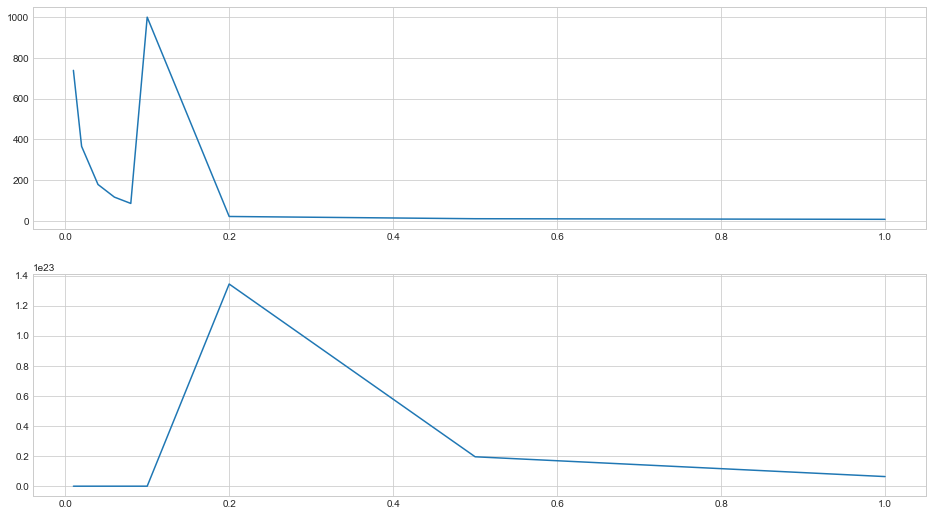

In [56]:
fig, ax = plt.subplots(2, 1, figsize=(16, 9))
ax[0].plot(rates, n_iters)
ax[1].plot(rates, approxs)

## Tweaking The Learning Rate